<a href="https://colab.research.google.com/github/GKS07/Classification_Projects/blob/main/Credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Credit Card Fraud Detection</h1><br>

Credit card fraud occur when an unauthorized user gain access to an individual credit information and use it for purchases or making a transactions.<br>

 so it is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.


<h2>Connecting to google drive, kaggle and downloading the dataset.

In [2]:
# uploading the kaggle jason file.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gau7rav","key":"50c43821a9373319816f6b8412be5c26"}'}

In [3]:
#making the Kaggle Directopry and copying the kaggle jason file.
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

#changing the permission.
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
# Downloading the Loan Approval Dataset.
!kaggle datasets download -d mlg-ulb/creditcardfraud

 88% 58.0M/66.0M [00:00<00:00, 84.9MB/s]
100% 66.0M/66.0M [00:00<00:00, 83.4MB/s]


In [5]:
# making the directory
! mkdir Credit_Card_Fraud

In [6]:
# unzipping the file.
! unzip creditcardfraud.zip -d Credit_Card_Fraud

Archive:  creditcardfraud.zip
  inflating: Credit_Card_Fraud/creditcard.csv  


In [7]:
# importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,f1_score


#Loading the Data

In [8]:
# Reading the data

cc_data = pd.read_csv("/content/Credit_Card_Fraud/creditcard.csv")

print("The first 6 rows of data are here:")
cc_data.head(6)

The first 6 rows of data are here:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0


In [9]:
print("The shape of the data is:", cc_data.shape)

The shape of the data is: (284807, 31)


In [10]:
cc_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [11]:
cc_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
cc_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [13]:
#checking the skewness of the data

print("The percentage of the no of fraud is:", round(cc_data['Class'].value_counts()[0]/len(cc_data) * 100,2), "%")
print("The percentage of the fraud that happen is:", round(cc_data['Class'].value_counts()[1]/len(cc_data)*100,2), "%")

The percentage of the no of fraud is: 99.83 %
The percentage of the fraud that happen is: 0.17 %


This dataset is highly imbalance training the model with this dataset will be overfit and may not predict the fraud case, as it is trained on data that has more cases of no fraud.

so, before traning the model we need to work on data to balance it.<br>

The features of the data are already scaled so i don't know about the features of the data that i'll use(this is done by the data provider due to privacy of the customers). the only thimg that is given in data is amount(the transaction amount) and the class(the transaction is fraud or not).



---



# Data Visualisation

lets see the distribution of the data.
it will be more clear that the data is highly imbalance and skewed.

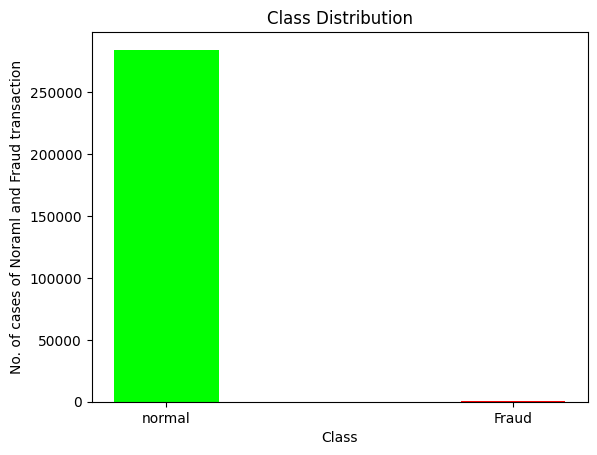

In [14]:
# class distribution.
clas = cc_data['Class'].value_counts()
labels = ['normal', 'Fraud']
colors = ['#00FF00', '#ff0000']
plt.bar(clas.index, clas.values, color =colors , width = 0.3 )
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("No. of cases of Noraml and Fraud transaction")
plt.title("Class Distribution")
plt.show()

In [15]:
# lets see the total amount that has been labeled as NORMAL and FRAUD.

noraml = cc_data[cc_data['Class'] == 0 ]
fraud = cc_data[cc_data['Class'] == 1]

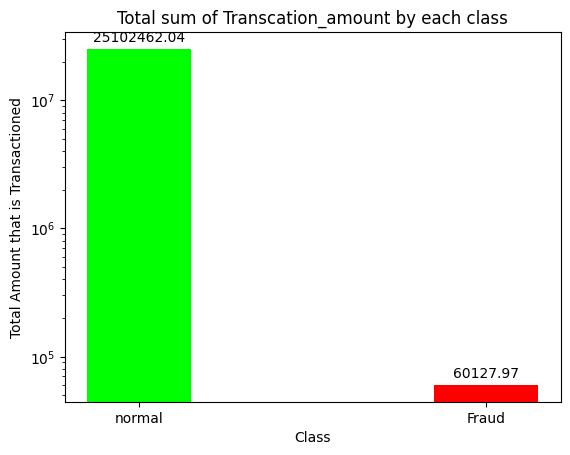

In [16]:
amount = [noraml.Amount.sum(), fraud.Amount.sum()]

fig = plt.figure()

# Add a subplot to the figure
ax = fig.add_subplot(111)

# Create the bar plot
bars = ax.bar(labels, amount, color = colors, width = 0.3)

# Loop through the bars and add annotations
for bar in bars:
   height = bar.get_height()
   ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
   textcoords="offset points", ha='center', va='bottom')

# Show the plot
plt.yscale("log")
plt.ylabel("Total Amount that is Transactioned")
plt.xlabel("Class")
plt.title("Total sum of Transcation_amount by each class")
plt.show()

<ipython-input-17-76730f158302>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amount_val, ax=axis[0], kde = True, color='red')


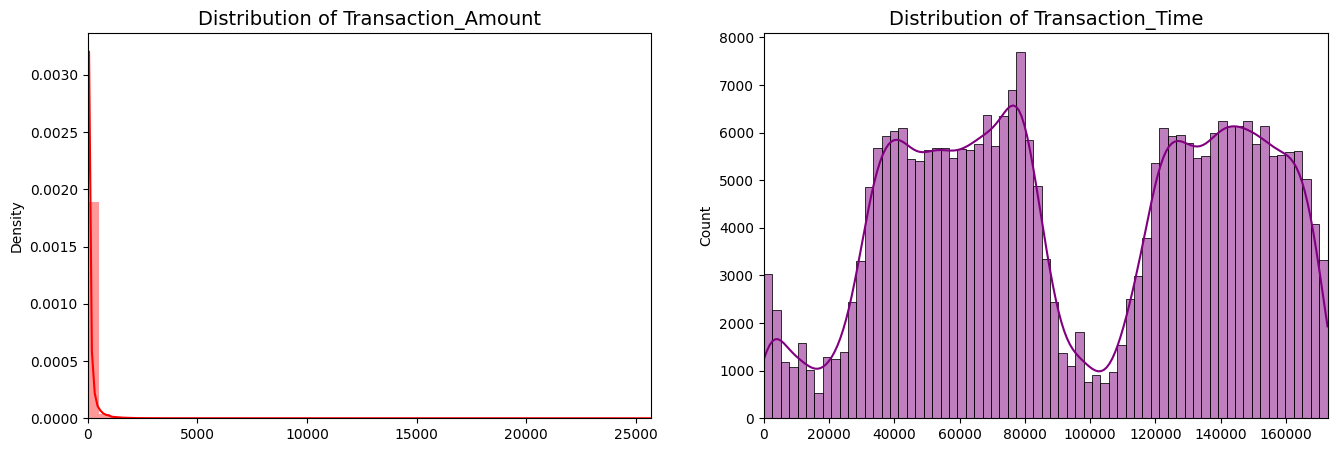

In [17]:
# lets check the distribution of transaction amount and the time

fig, axis = plt.subplots(1, 2, figsize=(16,5))

amount_val = cc_data['Amount'].values
time_val = cc_data['Time'].values

sns.distplot(amount_val, ax=axis[0], kde = True, color='red')
axis[0].set_title('Distribution of Transaction_Amount', fontsize=14)
axis[0].set_xlim([min(amount_val), max(amount_val)])

sns.histplot(time_val, ax=axis[1], color='purple', kde = True)
axis[1].set_title('Distribution of Transaction_Time', fontsize=14)
axis[1].set_xlim([min(time_val), max(time_val)])

plt.show()

# Data Preprocessing

In this section:-

1.   i'll scale the Time and Amount feature so that all the features are on
     same scale, other feature are already scaled by the data provider.
2.   we have imbalance(skewed) data, to make it balance i'll split the data(crate a sub-sample) into 50-50(i.e 50% of class fraud and same % of class non-fraud) so, that our model can understand what feature influnced most to categorise the data to fraud and non-fraud (making a good correlation).

In [18]:
# scaling the Amount and Time feature

scaler = StandardScaler()

cc_data['Scaled_Amount'] = scaler.fit_transform(cc_data['Amount'].values.reshape(-1, 1))
cc_data['Scaled_Time'] = scaler.fit_transform(cc_data['Time'].values.reshape(-1, 1))

cc_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Scaled_Amount,Scaled_Time
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964,-1.996583
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475,-1.996583
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686,-1.996562
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534,-1.996562
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403,-1.996541


In [19]:
# droping the Amount and Time

cc_data.drop(['Amount', 'Time'], axis = 1, inplace = True)
cc_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Scaled_Amount,Scaled_Time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


In [20]:
#splitting the data to train and test data, before balancing the data to check how much our model will improve after balancing the data.

fetures = cc_data.drop('Class', axis = 1)

dep = cc_data['Class']

In [21]:
# train_test split

x_train, x_test, y_train, y_test = train_test_split(fetures, dep, test_size = 0.3, random_state= 48)

In [22]:
#Defining the various model:

knn = KNeighborsClassifier(n_neighbors = 4, weights = "distance")

knn_model = knn.fit(x_train, y_train)

The Accuracy of Knn model on imbalance data is: 0.9994967405170698
The F1-score of the Knn model on imbalance data is: 0.86084142394822


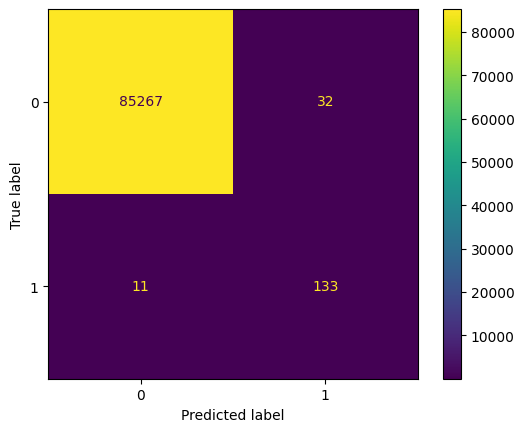

In [23]:
#Evaluating the KNN model

knn_pred = knn_model.predict(x_test)

knn_acc = accuracy_score(knn_pred, y_test)

knn_f1 = f1_score(knn_pred, y_test)

knn_cm = confusion_matrix(knn_pred, y_test)

print("The Accuracy of Knn model on imbalance data is:", knn_acc)
print("The F1-score of the Knn model on imbalance data is:", knn_f1)

labels = [0, 1]
disp = ConfusionMatrixDisplay(confusion_matrix = knn_cm, display_labels = labels)
disp.plot()

In [24]:
# GaussianNB
GNB = GaussianNB()

gnb_model = GNB.fit(x_train, y_train)

The Accuracy of GaussianNB model on imbalance data is: 0.9772713973058063
The F1-score of the GaussianNB model on imbalance data is: 0.13070725156669652


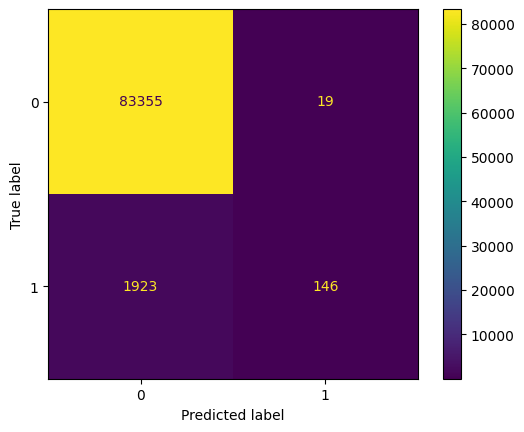

In [25]:
#Evaluating the GaussianNB model

gnb_pred = gnb_model.predict(x_test)

gnb_acc = accuracy_score(gnb_pred, y_test)

gnb_f1 = f1_score(gnb_pred, y_test)

gnb_cm = confusion_matrix(gnb_pred, y_test)

print("The Accuracy of GaussianNB model on imbalance data is:", gnb_acc)
print("The F1-score of the GaussianNB model on imbalance data is:", gnb_f1)

labels = [0, 1]
disp = ConfusionMatrixDisplay(confusion_matrix= gnb_cm, display_labels= labels)
disp.plot()

In [26]:
# SVC calssifier
svc = SVC()

svc_model = svc.fit(x_train, y_train)

The Accuracy of svc model on imbalance data is: 0.9993914071369217
The F1-score of the svc model on imbalance data is: 0.8231292517006803


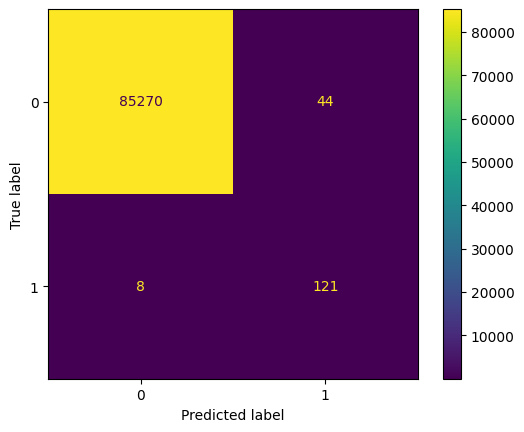

In [27]:
#Evaluating the svc model

svc_pred = svc_model.predict(x_test)

svc_acc = accuracy_score(svc_pred, y_test)

svc_f1 = f1_score(svc_pred, y_test)

svc_cm = confusion_matrix(svc_pred, y_test)

print("The Accuracy of svc model on imbalance data is:", svc_acc)
print("The F1-score of the svc model on imbalance data is:", svc_f1)

labels = [0, 1]
disp = ConfusionMatrixDisplay(confusion_matrix = svc_cm, display_labels = labels)
disp.plot()

The models are performing good but the data is highly imbalance and the chance of overfitting is high. as it skewed towards non-fraud cases. so the chances of predicting the fraud cases is very low. even if the unseen data is case of fraud.

So, now i'll  balance the data and then fitting to the model after preprocessing.

In [28]:
#Balancing the data.


cc_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Scaled_Amount,Scaled_Time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


In [29]:
# shuffling the data before split.

cc_data = cc_data.sample(frac = 1)

#there is 492 cases of fraud.

fraud_case = cc_data.loc[cc_data['Class'] == 1]   # taking the fraud cases out from the original dataframe.

non_fraud_case = cc_data.loc[cc_data['Class'] == 0][:492] # taking out same amount of non fraud case from the original dataframe

bal_cc_data = pd.concat([fraud_case, non_fraud_case])  #cancating both the split data into one dataframe.

# Shuffling the data.
bal_cc_data = bal_cc_data.sample(frac=1, random_state=42)

bal_cc_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Scaled_Amount,Scaled_Time
54054,1.058896,-0.035216,1.166125,1.234693,-0.737172,0.058494,-0.519401,0.142747,0.411004,-0.068468,...,0.458669,-0.014264,0.085758,0.264157,-0.337097,0.073666,0.044743,0,-0.173316,-1.022254
245347,0.051075,1.310427,0.733222,2.620282,1.402358,0.528489,1.086014,-0.146423,-1.724333,1.280167,...,0.766927,-0.189624,0.766853,-0.141401,-0.077278,-0.297595,-0.221816,1,-0.343354,1.219173
14194,1.265967,-0.552856,-0.673651,-0.841749,1.466318,3.728009,-1.099314,0.978145,0.781236,-0.238880,...,0.013127,-0.118375,1.108287,0.508419,1.165877,-0.043794,0.003873,0,-0.281664,-1.465334
237107,1.184891,3.152084,-6.134780,5.531252,1.733867,-1.816861,-0.916696,0.265568,-3.158014,-3.890169,...,-0.823865,-0.079887,0.028828,0.389711,0.060171,0.485187,0.326552,1,-0.353229,1.143069
17317,-27.848181,15.598193,-28.923756,6.418442,-20.346228,-4.828202,-19.210896,18.329406,-3.668735,-8.009159,...,-2.062934,-1.269843,0.165409,1.999499,-0.211059,1.324809,0.388090,1,0.046539,-1.393800


In [30]:
print("The shape of balnced data is:", bal_cc_data.shape)

The shape of balnced data is: (984, 31)


# Data visualization and Data Preprocessing on Balanced data.

The distribution of the data is:
 0    492
1    492
Name: Class, dtype: int64


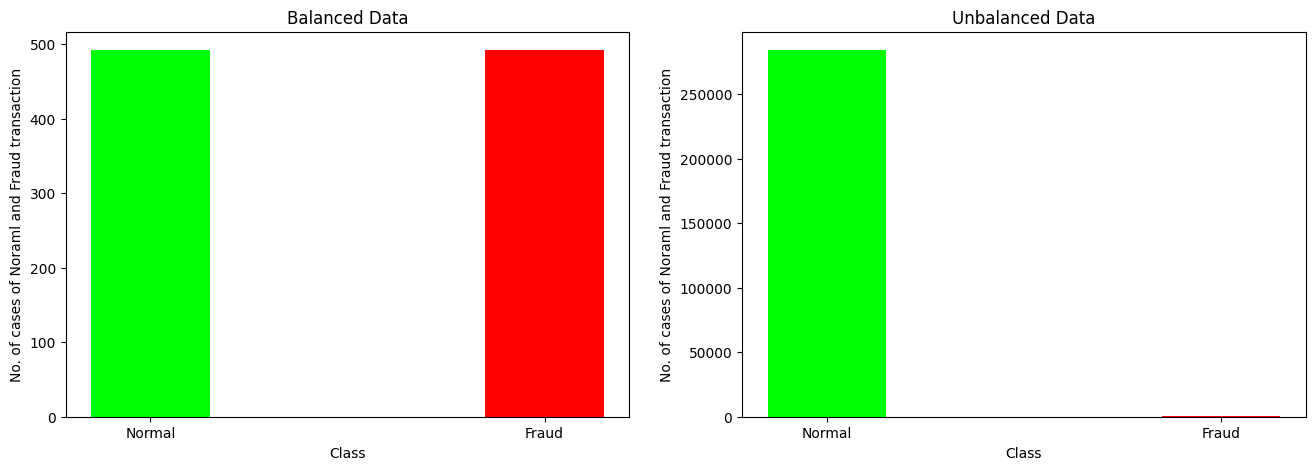

In [31]:
# class distribution of the balanced data.

print("The distribution of the data is:\n", bal_cc_data['Class'].value_counts()) # counting the diffrent values in class feature.

fig, axis = plt.subplots(1, 2, figsize = (16,5))

clas2 = bal_cc_data['Class'].value_counts()
labels = ['Normal', 'Fraud']
colors = ['#00FF00', '#ff0000']
axis[0].bar(clas2.index, clas2.values, color =colors , width = 0.3 )
axis[0].set_xlabel("Class")
axis[0].set_ylabel("No. of cases of Noraml and Fraud transaction")
axis[0].set_title("Balanced Data")
axis[0].set_xticks(range(2), labels)

clas = cc_data['Class'].value_counts()
axis[1].bar(clas.index, clas.values, color = colors, width = 0.3)
axis[1].set_xlabel("Class")
axis[1].set_ylabel("No. of cases of Noraml and Fraud transaction")
axis[1].set_title("Unbalanced Data")

plt.xticks(range(2), labels)
#plt.title("Class Distribution of /t Balanced and Unbalanced data")
plt.show()

Correaltion in unbalanced data and the Balanced data.


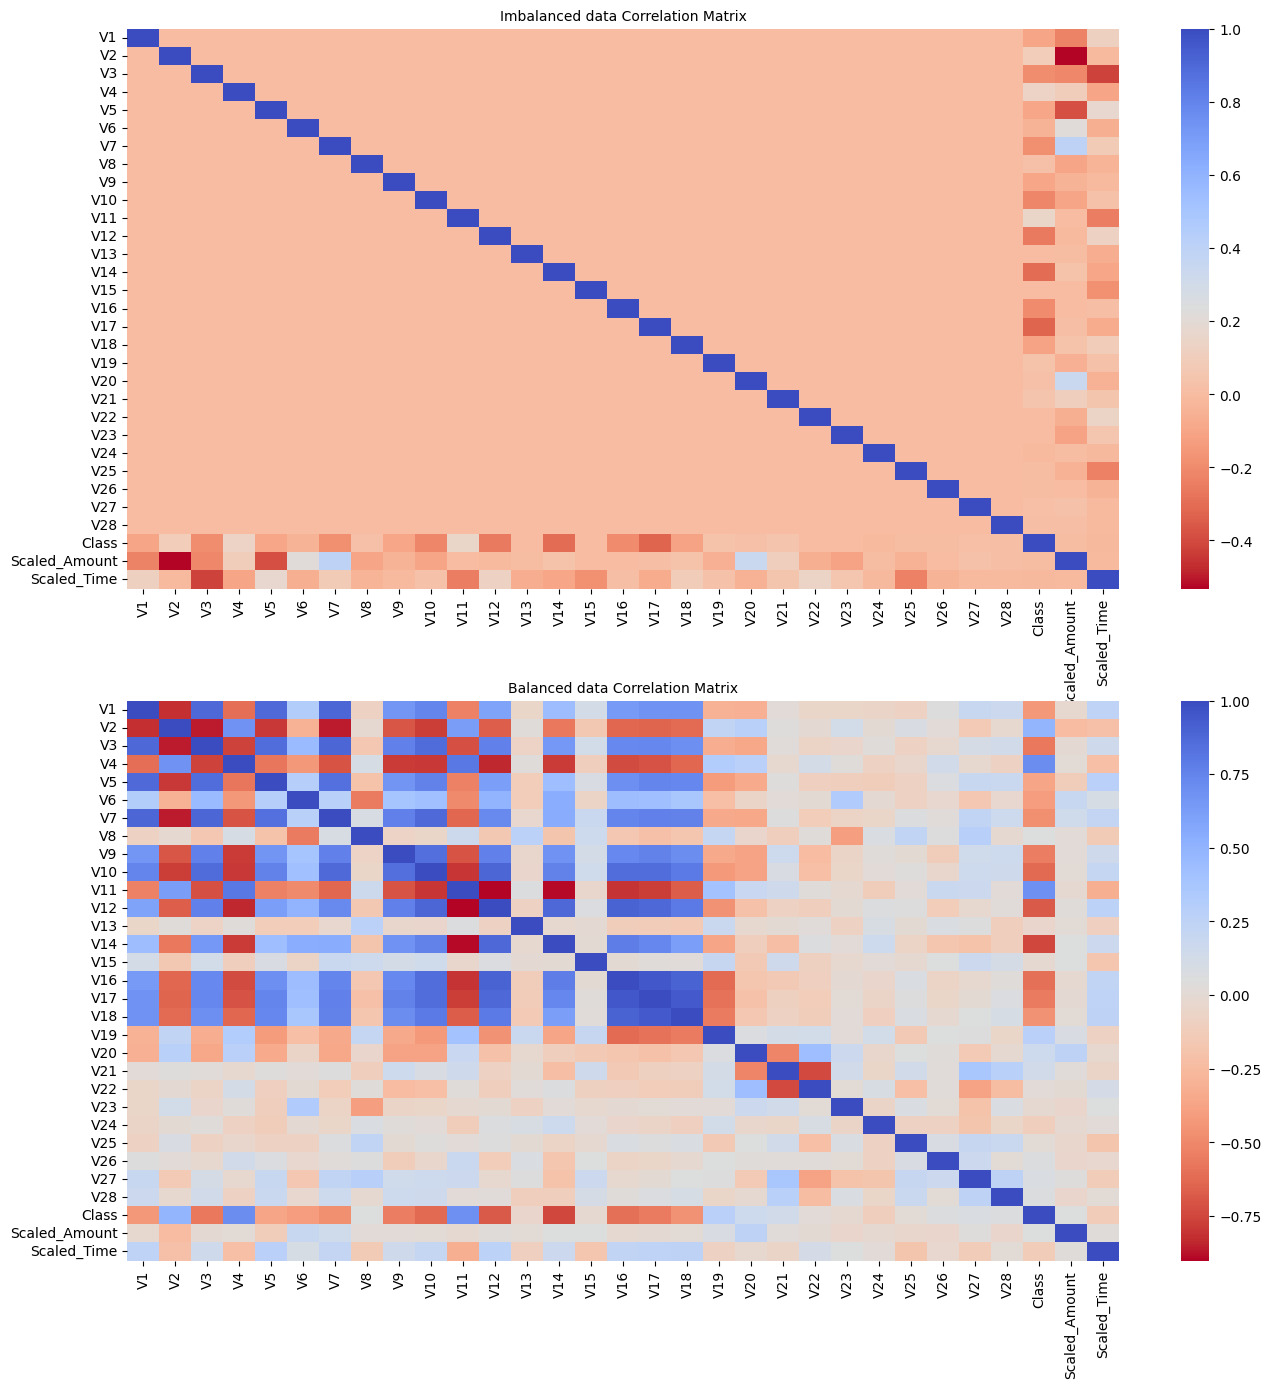

In [32]:
# lets check the correlation between the features and the target feature Class.

print("Correaltion in unbalanced data and the Balanced data.")

corr1 = cc_data.corr() # correlation in old data
corr2 = bal_cc_data.corr() # correlation in balanced data.


fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (16,16))

sns.heatmap(corr1, cmap='coolwarm_r', annot_kws = {'size':20}, ax = ax1)
ax1.set_title("Imbalanced data Correlation Matrix", fontsize = 10)

sns.heatmap(corr2, cmap='coolwarm_r', annot_kws = {'size':20}, ax = ax2)
ax2.set_title('Balanced data Correlation Matrix', fontsize = 10)
plt.show()

With this heatmap it is clear that some of the features are positively correlated and some of them are negatively correalted.

**+Ve Correlation** means the higher the values are most likely to be a case of fraud.

**-Ve Correlation** means the lower the values are most likely to be a case of fraud.

the features like V2, V4, V11, V19 are highly postively correlated.
and the features like V1, V3, V7, V9, V10, V12, V14 and others are highly -ve correlated.



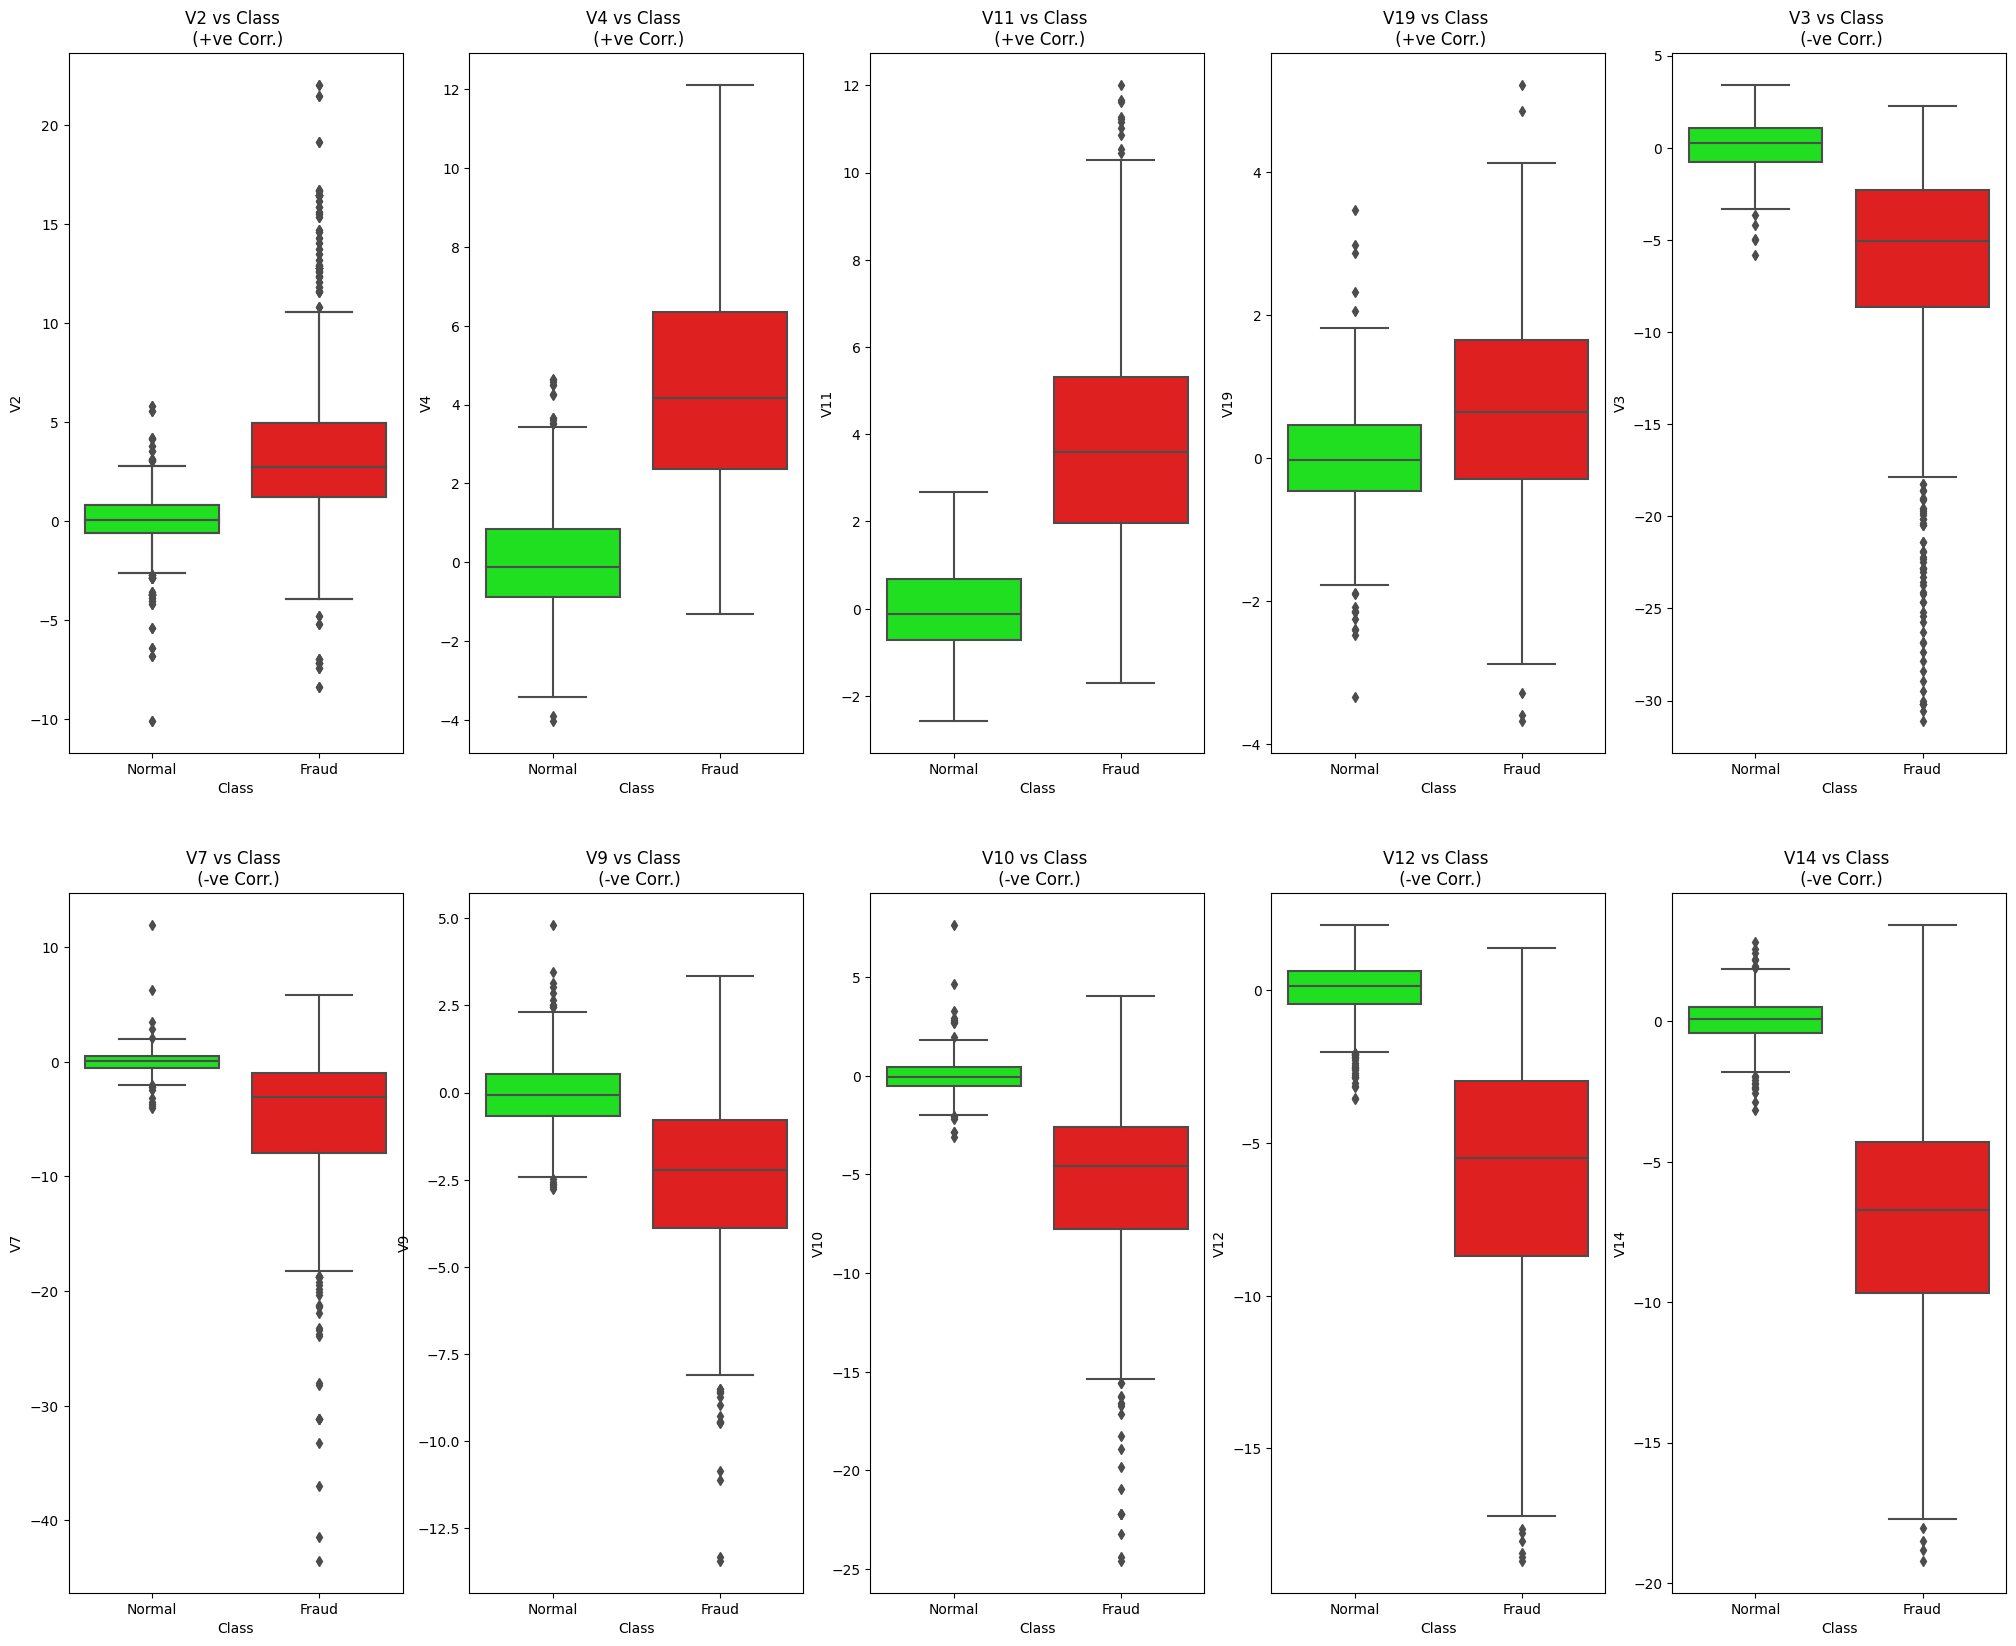

In [33]:
# now lets visualize some of them.

fig, axis = plt.subplots(2, 5, figsize = (25,20))

sns.boxplot(data = bal_cc_data, x = 'Class', y = "V2", palette = colors, ax = axis[0,0])
axis[0,0].set_xticks(range(2), labels)
axis[0,0].set_title("V2 vs Class \n (+ve Corr.)")

sns.boxplot(data = bal_cc_data, x = 'Class', y = "V4", palette = colors, ax = axis[0,1])
axis[0,1].set_xticks(range(2), labels)
axis[0,1].set_title("V4 vs Class \n (+ve Corr.)")

sns.boxplot(data = bal_cc_data, x = 'Class', y = "V11", palette = colors, ax = axis[0,2])
axis[0,2].set_xticks(range(2), labels)
axis[0,2].set_title("V11 vs Class \n (+ve Corr.)")

sns.boxplot(data = bal_cc_data, x = 'Class', y = "V19", palette = colors, ax = axis[0,3])
axis[0,3].set_xticks(range(2), labels)
axis[0,3].set_title("V19 vs Class \n (+ve Corr.)")

sns.boxplot(data = bal_cc_data, x = 'Class', y = "V2", palette = colors, ax = axis[0,0])
axis[0,0].set_xticks(range(2), labels)
axis[0,0].set_title("V2 vs Class \n (+ve Corr.)")

sns.boxplot(data = bal_cc_data, x = 'Class', y = "V3", palette = colors, ax = axis[0,4])
axis[0,4].set_xticks(range(2), labels)
axis[0,4].set_title("V3 vs Class \n (-ve Corr.)")

sns.boxplot(data = bal_cc_data, x = 'Class', y = "V7", palette = colors, ax = axis[1,0])
axis[1,0].set_xticks(range(2), labels)
axis[1,0].set_title("V7 vs Class \n (-ve Corr.)")

sns.boxplot(data = bal_cc_data, x = 'Class', y = "V9", palette = colors, ax = axis[1,1])
axis[1,1].set_xticks(range(2), labels)
axis[1,1].set_title("V9 vs Class \n (-ve Corr.)")

sns.boxplot(data = bal_cc_data, x = 'Class', y = "V10", palette = colors, ax = axis[1,2])
axis[1,2].set_xticks(range(2), labels)
axis[1,2].set_title("V10 vs Class \n (-ve Corr.)")

sns.boxplot(data = bal_cc_data, x = 'Class', y = "V12", palette = colors, ax = axis[1,3])
axis[1,3].set_xticks(range(2), labels)
axis[1,3].set_title("V12 vs Class \n (-ve Corr.)")

sns.boxplot(data = bal_cc_data, x = 'Class', y = "V14", palette = colors, ax = axis[1,4])
axis[1,4].set_xticks(range(2), labels)
axis[1,4].set_title("V14 vs Class \n (-ve Corr.)")

plt.show()


There are outliers present in features, when their is case of fraud. before moving ahead we need to remove the outliers.

but before lets see the distribution of these features.

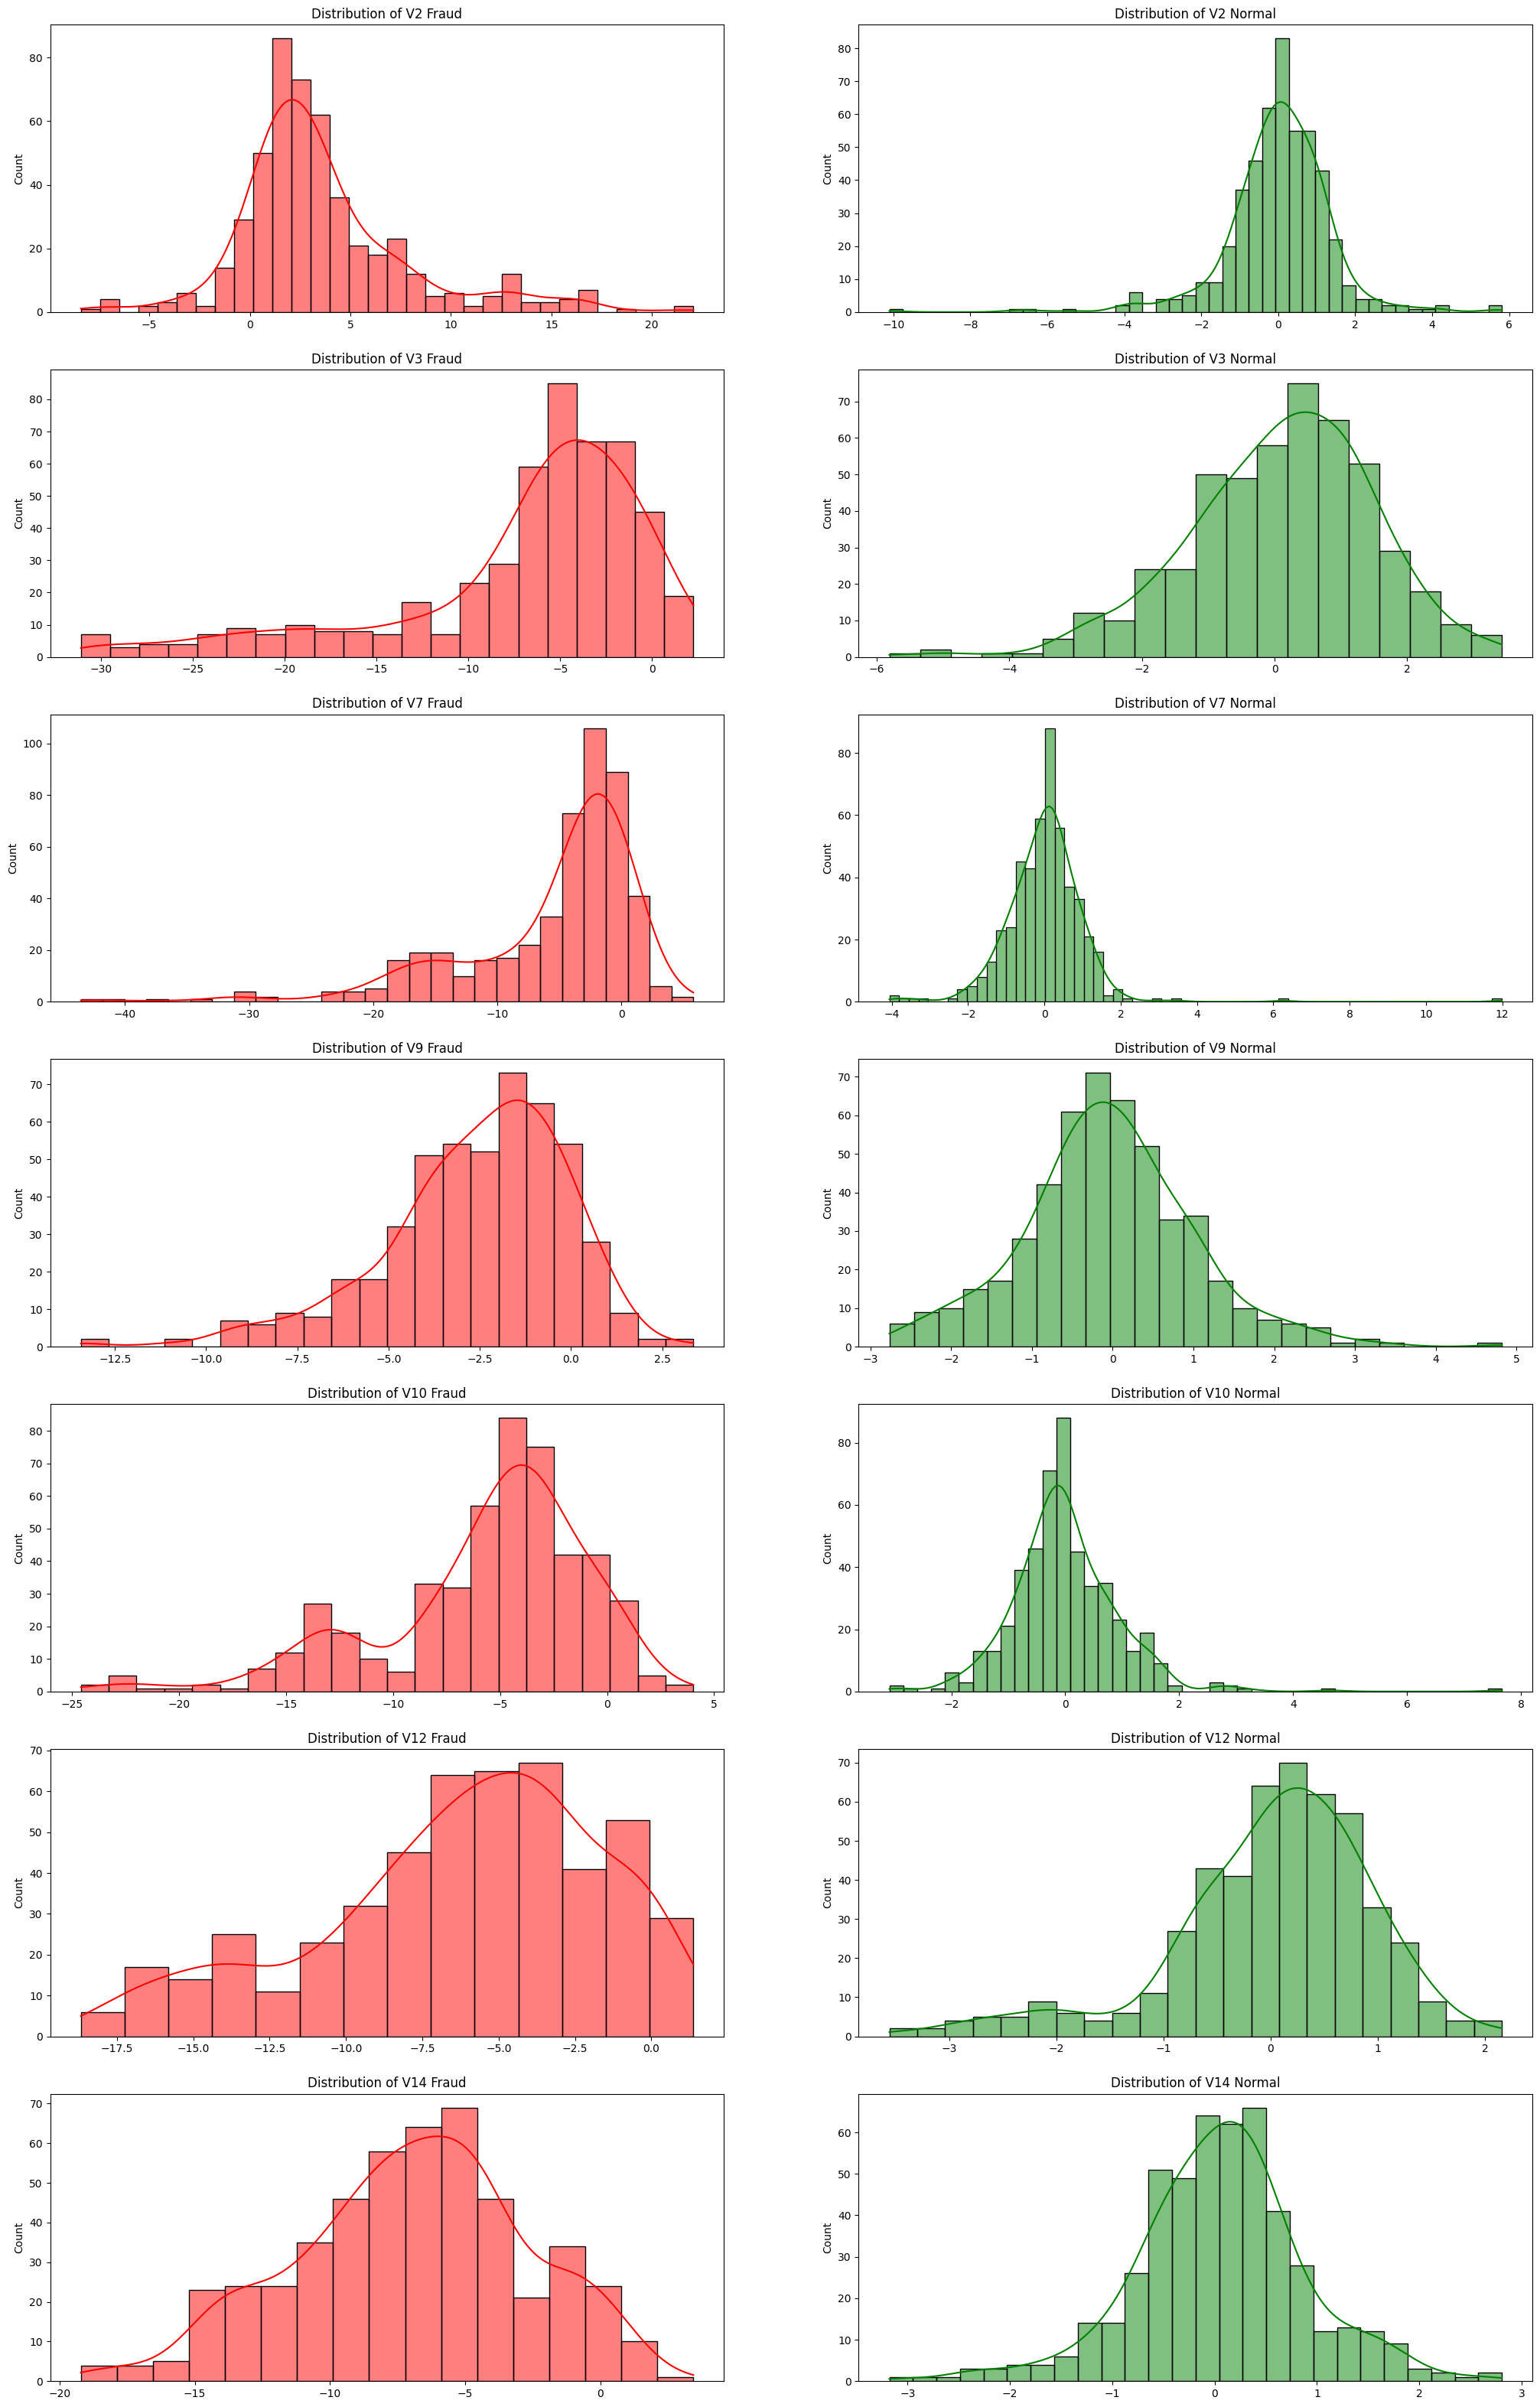

In [34]:
# ploting the distribution of the above features.


v2_fraud = bal_cc_data['V2'].loc[bal_cc_data['Class'] == 1].values
v2_norm = bal_cc_data['V2'].loc[bal_cc_data['Class'] == 0].values

v3_fraud = bal_cc_data['V3'].loc[bal_cc_data['Class'] == 1].values
v3_norm = bal_cc_data['V3'].loc[bal_cc_data['Class'] == 0].values

v7_fraud = bal_cc_data['V7'].loc[bal_cc_data['Class'] == 1].values
v7_norm = bal_cc_data['V7'].loc[bal_cc_data['Class'] == 0].values

v9_fraud = bal_cc_data['V9'].loc[bal_cc_data['Class'] == 1].values
v9_norm = bal_cc_data['V9'].loc[bal_cc_data['Class'] == 0].values

v10_fraud = bal_cc_data['V10'].loc[bal_cc_data['Class'] == 1].values
v10_norm = bal_cc_data['V10'].loc[bal_cc_data['Class'] == 0].values

v12_fraud = bal_cc_data['V12'].loc[bal_cc_data['Class'] == 1].values
v12_norm = bal_cc_data['V12'].loc[bal_cc_data['Class'] == 0].values

v14_fraud = bal_cc_data['V14'].loc[bal_cc_data['Class'] == 1].values
v14_norm = bal_cc_data['V14'].loc[bal_cc_data['Class'] == 0].values


fig, axis = plt.subplots(7, 2, figsize = (25,40))

sns.histplot( x = v2_fraud, kde = True, color = 'red', ax = axis[0,0])
axis[0,0].set_title("Distribution of V2 Fraud")

sns.histplot( x = v2_norm, kde = True,color = 'green', ax = axis[0,1])
axis[0,1].set_title("Distribution of V2 Normal")

sns.histplot( x = v3_fraud, kde = True, color = 'red', ax = axis[1,0])
axis[1,0].set_title("Distribution of V3 Fraud")

sns.histplot( x = v3_norm, kde = True, color = 'green', ax = axis[1,1])
axis[1,1].set_title("Distribution of V3 Normal")

sns.histplot( x = v7_fraud, kde = True, color = 'red', ax = axis[2,0])
axis[2,0].set_title("Distribution of V7 Fraud")

sns.histplot( x = v7_norm, kde = True, color = 'green', ax = axis[2,1])
axis[2,1].set_title("Distribution of V7 Normal")

sns.histplot( x = v9_fraud, kde = True, color = 'red', ax = axis[3,0])
axis[3,0].set_title("Distribution of V9 Fraud")

sns.histplot( x = v9_norm, kde = True, color = 'green', ax = axis[3,1])
axis[3,1].set_title("Distribution of V9 Normal")

sns.histplot( x = v10_fraud, kde = True, color = 'red', ax = axis[4,0])
axis[4,0].set_title("Distribution of V10 Fraud")

sns.histplot( x = v10_norm, kde = True, color = 'green', ax = axis[4,1])
axis[4,1].set_title("Distribution of V10 Normal")

sns.histplot( x = v12_fraud, kde = True, color = 'red', ax = axis[5,0])
axis[5,0].set_title("Distribution of V12 Fraud")

sns.histplot( x = v12_norm, kde = True, color = 'green', ax = axis[5,1])
axis[5,1].set_title("Distribution of V12 Normal")

sns.histplot( x = v14_fraud, kde = True, color = 'red', ax = axis[6,0])
axis[6,0].set_title("Distribution of V14 Fraud")

sns.histplot( x = v14_norm, kde = True, color = 'green', ax = axis[6,1])
axis[6,1].set_title("Distribution of V14 Normal")

plt.show()

The Normal case distribution of the features are gausian or naormal distribution or close to it. but the fraud the fraud case distribution are not likely to be a Gaussian/Noraml distribution except v14 fraud, and v2 are close to it. so now lets remove the outliers from these uneven distributions.

In [35]:
# Removing the outliers from features(fraud_case)

# defining the IQR for the V3_Fraud

print("\n\n","@@**@@" * 20)

v3_Q1 =np.percentile(v3_fraud, 25)
v3_Q3 = np.percentile(v3_fraud, 75)

print("\n\nThe 25 quantile of v3_fraud case is:", v3_Q1, "and the 75 quantile of v3_fraud case is:", v3_Q3)

v3_IQR = v3_Q3 - v3_Q1

print("\nThe Inter Quantile Range(IQR) of the v3_fraud case is:", v3_IQR)

# defining the lower and upper bound for the outliers

v3_LB = v3_Q1 - 1.5 * v3_IQR  # q1 - cut-off (1.5 * IQR)
v3_UB = v3_Q3 + 1.5 * v3_IQR

print("\nThe Upper and the Lower bound of the v3_fraud case is:", v3_UB, "and", v3_LB)


v3_outliers = [o for o in v3_fraud if o < v3_LB or o > v3_UB]
print('\n\nNumber of outliers in v3_fraud are: {}'.format(len(v3_outliers)))
print('\n And these outliers are:{}'.format(v3_outliers))

print("\n\n\n\n")

bal_cc_data = bal_cc_data.drop(bal_cc_data[(bal_cc_data['V3'] > v3_UB) | (bal_cc_data['V3'] < v3_LB)].index)
print('Number of rows after the removal of V3 outliers are: {}'.format(len(bal_cc_data)))

print("\n\n")
# Defining the IQR for v7_fraud

print("\n\n","@@**@@" * 20)

v7_Q1 =np.percentile(v7_fraud, 25)
v7_Q3 = np.percentile(v7_fraud, 75)

print("\n\nThe 25 quantile of v7_fraud case is:", v7_Q1, "and the 75 quantile of v7_fraud case is:", v7_Q3)

v7_IQR = v7_Q3 - v7_Q1

print("\nThe Inter Quantile Range(IQR) of the v7_fraud case is:", v7_IQR)

# defining the lower and upper bound for the outliers

v7_LB = v7_Q1 - 1.5 * v7_IQR  # q1 - cut-off (1.5 * IQR)
v7_UB = v7_Q3 + 1.5 * v7_IQR

print("\nThe Upper and the Lower bound of the v7_fraud case is:", v7_UB, "and", v7_LB)


v7_outliers = [o for o in v7_fraud if o < v7_LB or o > v7_UB]
print('\n\nNumber of outliers in v7_fraud are: {}'.format(len(v7_outliers)))
print('\n And these outliers are:{}'.format(v7_outliers))

print("\n\n\n\n")

bal_cc_data = bal_cc_data.drop(bal_cc_data[(bal_cc_data['V7'] > v7_UB) | (bal_cc_data['V7'] < v7_LB)].index)
print('Number of rows after the removal of V7 outliers are: {}'.format(len(bal_cc_data)))

print("\n\n")

#defining the IQR of v10 fraud

print("\n\n","@@**@@" * 20)

v10_Q1 =np.percentile(v10_fraud, 25)
v10_Q3 = np.percentile(v10_fraud, 75)

print("\n\nThe 25 quantile of v10_fraud case is:", v10_Q1, "and the 75 quantile of v10_fraud case is:", v10_Q3)

v10_IQR = v10_Q3 - v10_Q1

print("\nThe Inter Quantile Range(IQR) of the v10_fraud case is:", v10_IQR)

# defining the lower and upper bound for the outliers

v10_LB = v10_Q1 - 1.5 * v10_IQR  # q1 - cut-off (1.5 * IQR)
v10_UB = v10_Q3 + 1.5 * v10_IQR

print("\nThe Upper and the Lower bound of the v10_fraud case is:", v10_UB, "and", v10_LB)


v10_outliers = [o for o in v10_fraud if o < v10_LB or o > v10_UB]
print('\n\nNumber of outliers in v10_fraud are: {}'.format(len(v10_outliers)))
print('\n And these outliers are:{}'.format(v10_outliers))


print("\n\n\n\n")

bal_cc_data = bal_cc_data.drop(bal_cc_data[(bal_cc_data['V10'] > v10_UB) | (bal_cc_data['V10'] < v10_LB)].index)
print('Number of rows after the removal of V10 outliers are: {}'.format(len(bal_cc_data)))

print("\n\n")


#defining the IQR of v12 Fraud

print("\n\n","@@**@@" * 20)

v12_Q1 =np.percentile(v12_fraud, 25)
v12_Q3 = np.percentile(v12_fraud, 75)

print("\n\nThe 25 quantile of v12_fraud case is:", v12_Q1, "and the 75 quantile of v3_fraud case is:", v12_Q3)

v12_IQR = v12_Q3 - v12_Q1

print("\nThe Inter Quantile Range(IQR) of the v12_fraud case is:", v12_IQR)

# defining the lower and upper bound for the outliers

v12_LB = v12_Q1 - 1.5 * v12_IQR  # q1 - cut-off (1.5 * IQR)
v12_UB = v12_Q3 + 1.5 * v12_IQR

print("\nThe Upper and the Lower bound of the v12_fraud case is:", v12_UB, "and", v12_LB)


v12_outliers = [o for o in v12_fraud if o < v12_LB or o > v12_UB]
print('\n\nNumber of outliers in v12_fraud are: {}'.format(len(v12_outliers)))
print('\n And these outliers are:{}'.format(v12_outliers))


print("\n\n\n\n")

bal_cc_data = bal_cc_data.drop(bal_cc_data[(bal_cc_data['V12'] > v12_UB) | (bal_cc_data['V12'] < v12_LB)].index)
print('Number of rows after the removal of V12 outliers are: {}'.format(len(bal_cc_data)))

print("\n\n")


# defining the IQR for v14_ fraud

print("\n\n","@@**@@" * 20)

v14_Q1 =np.percentile(v14_fraud, 25)
v14_Q3 = np.percentile(v14_fraud, 75)

print("\n\nThe 25 quantile of v14_fraud case is:", v14_Q1, "and the 75 quantile of v14_fraud case is:", v14_Q3)

v14_IQR = v14_Q3 - v14_Q1

print("\nThe Inter Quantile Range(IQR) of the v14_fraud case is:", v14_IQR)

# defining the lower and upper bound for the outliers

v14_LB = v14_Q1 - 1.5 * v14_IQR  # q1 - cut-off (1.5 * IQR)
v14_UB = v14_Q3 + 1.5 * v14_IQR

print("\nThe Upper and the Lower bound of the v14_fraud case is:", v14_UB, "and", v14_LB)


v14_outliers = [o for o in v14_fraud if o < v14_LB or o > v14_UB]
print('\n\nNumber of outliers in v14_fraud are: {}'.format(len(v14_outliers)))
print('\n And these outliers are:{}'.format(v14_outliers))

print("\n\n\n\n")

bal_cc_data = bal_cc_data.drop(bal_cc_data[(bal_cc_data['V14'] > v14_UB) | (bal_cc_data['V14'] < v14_LB)].index)
print('Number of rows after the removal of V14 outliers are: {}'.format(len(bal_cc_data)))

print("\n\n")




 @@**@@@@**@@@@**@@@@**@@@@**@@@@**@@@@**@@@@**@@@@**@@@@**@@@@**@@@@**@@@@**@@@@**@@@@**@@@@**@@@@**@@@@**@@@@**@@@@**@@


The 25 quantile of v3_fraud case is: -8.643489255766207 and the 75 quantile of v3_fraud case is: -2.27618472719291

The Inter Quantile Range(IQR) of the v3_fraud case is: 6.367304528573297

The Upper and the Lower bound of the v3_fraud case is: 7.274772065667036 and -18.194446048626155


Number of outliers in v3_fraud are: 53

 And these outliers are:[-28.923755945104, -21.405835744128, -19.5750661905691, -19.1336024646827, -30.5586968214292, -28.4074244550982, -22.8652284959099, -30.1773174564996, -25.7337337663194, -22.209874815521, -18.6498531851945, -18.572307456296, -24.2021422329158, -20.4919522106577, -20.4919522106577, -21.4029168131391, -31.1036848245812, -24.6677412485732, -19.7393862972953, -26.2787005866145, -30.1773174564996, -30.1773174564996, -20.1346128135864, -19.8189818085279, -23.7364434105216, -27.3686502881266, -24.098871851647, -19.62951525

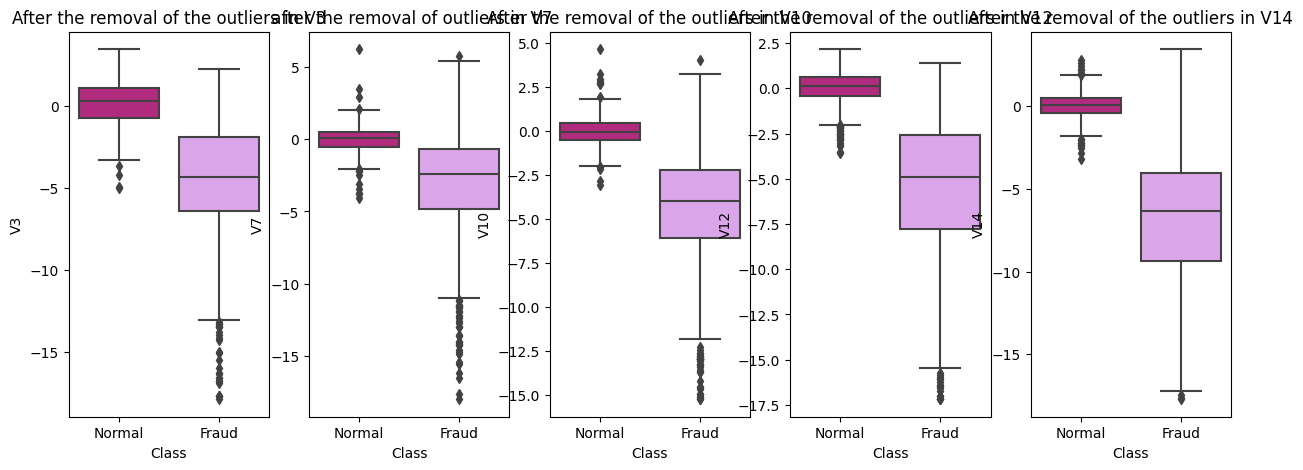

In [36]:
# lets see the outliers again if their is change or not.

colr = ['#C71585', '#e29bf4']
fig, axis = plt.subplots(1, 5, figsize = (15,5))

sns.boxplot(data = bal_cc_data, x = 'Class', y = "V3", palette = colr, ax = axis[0])
axis[0].set_xticks(range(2), labels)
axis[0].set_title("After the removal of the outliers in V3")

sns.boxplot(data = bal_cc_data, x = 'Class', y = "V7", palette = colr, ax = axis[1])
axis[1].set_xticks(range(2), labels)
axis[1].set_title(" after the removal of outliers in V7")

sns.boxplot(data = bal_cc_data, x = 'Class', y = "V10", palette = colr, ax = axis[2])
axis[2].set_xticks(range(2), labels)
axis[2].set_title("After the removal of the outliers in V10")

sns.boxplot(data = bal_cc_data, x = 'Class', y = "V12", palette = colr, ax = axis[3])
axis[3].set_xticks(range(2), labels)
axis[3].set_title("After the removal of the outliers in V12")

sns.boxplot(data = bal_cc_data, x = 'Class', y = "V14", palette = colr, ax = axis[4])
axis[4].set_xticks(range(2), labels)
axis[4].set_title("After the removal of the outliers in V14")


plt.show()


# **Defining the model**

In [40]:
# splitting teh data into dependent and independent variable.
feat = bal_cc_data.drop('Class', axis = 1)
cla = bal_cc_data['Class']

In [41]:
# splitting the data into train and test data.
bal_x_train, bal_x_test, bal_y_train, bal_y_test = train_test_split(feat, cla, test_size = 0.2, random_state= 28)

The Accuracy of Knn model on imbalance data is: 0.9562841530054644
The F1-score of the Knn model on imbalance data is: 0.9518072289156626


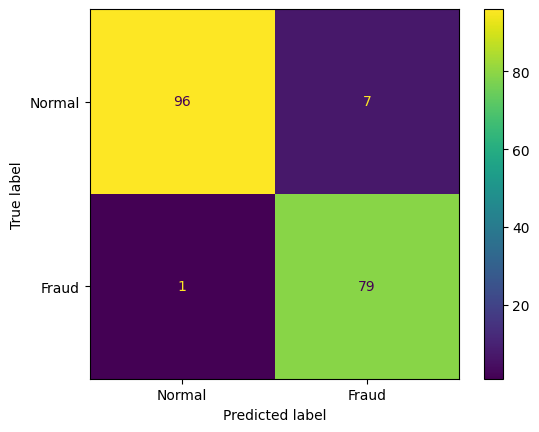

In [42]:
#Training the diffrent model
#KNN model

knn = KNeighborsClassifier(n_neighbors = 4, weights = "distance")

bal_knn_model = knn.fit(bal_x_train, bal_y_train)


#Evaluating the KNN model

bal_knn_pred = bal_knn_model.predict(bal_x_test)

bal_knn_acc = accuracy_score(bal_knn_pred, bal_y_test)

bal_knn_f1 = f1_score(bal_knn_pred, bal_y_test)

bal_knn_cm = confusion_matrix(bal_knn_pred, bal_y_test)

print("The Accuracy of Knn model on imbalance data is:", bal_knn_acc)
print("The F1-score of the Knn model on imbalance data is:", bal_knn_f1)

labels = ['Normal', 'Fraud']
disp = ConfusionMatrixDisplay(confusion_matrix = bal_knn_cm, display_labels = labels)
disp.plot()

The Accuracy of GaussianNB model on imbalance data is: 0.9453551912568307
The F1-score of the GaussianNB model on imbalance data is: 0.9397590361445783


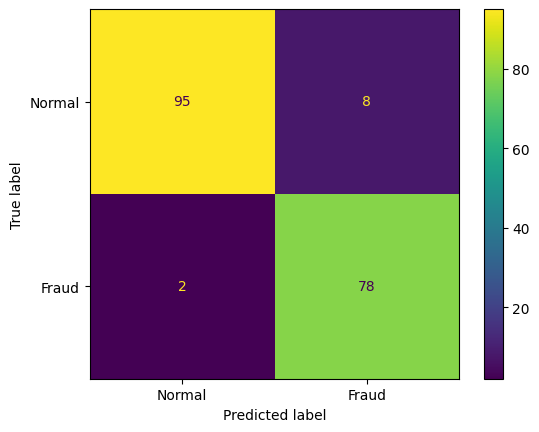

In [43]:
# GaussianNB
GNB = GaussianNB()

bal_gnb_model = GNB.fit(bal_x_train, bal_y_train)

bal_gnb_pred = bal_gnb_model.predict(bal_x_test)

bal_gnb_acc = accuracy_score(bal_gnb_pred, bal_y_test)

bal_gnb_f1 = f1_score(bal_gnb_pred, bal_y_test)

bal_gnb_cm = confusion_matrix(bal_gnb_pred, bal_y_test)

print("The Accuracy of GaussianNB model on imbalance data is:", bal_gnb_acc)
print("The F1-score of the GaussianNB model on imbalance data is:", bal_gnb_f1)

labels = ['Normal', 'Fraud']
disp = ConfusionMatrixDisplay(confusion_matrix = bal_gnb_cm, display_labels= labels)
disp.plot()

The Accuracy of svc model on imbalance data is: 0.8852459016393442
The F1-score of the svc model on imbalance data is: 0.8609271523178808


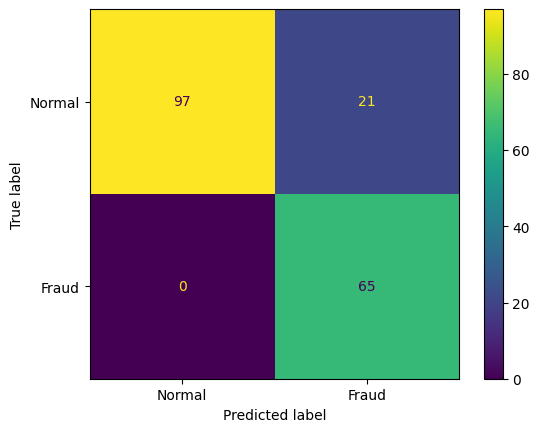

In [44]:
# SVC calssifier
svc = SVC()

bal_svc_model = svc.fit(bal_x_train, bal_y_train)


#Evaluating the svc model

bal_svc_pred = svc_model.predict(bal_x_test)

bal_svc_acc = accuracy_score(bal_svc_pred, bal_y_test)

bal_svc_f1 = f1_score(bal_svc_pred, bal_y_test)

bal_svc_cm = confusion_matrix(bal_svc_pred, bal_y_test)

print("The Accuracy of svc model on imbalance data is:", bal_svc_acc)
print("The F1-score of the svc model on imbalance data is:", bal_svc_f1)

labels = ['Normal', 'Fraud']
disp = ConfusionMatrixDisplay(confusion_matrix = bal_svc_cm, display_labels = labels)
disp.plot()

The Accuracy of the model is good but this can br improved as we have lost information while undersampling the original data and removing the outliers. the other way of balancing the data is oversampling or **SMOTE**(**Synthetic Minority Over-sampling Technique**).  in this we will raise the minor data(in this case non-fraud transaction) to the level of major data.

